## Goal

Create a grid for
- 2D circle
- 2D disk
- 3D sphere surface
- 3D sphere
- 4D hypersphere surface

## 2D circle

We focus on sampling evenly spaced points from a 2-D circle of radius $r$.  Formally, the points on the circle forms the following set:
\begin{align}
\mathcal{S}^1&=\{(x,y)\in \mathbb{R}^2: x^2+y^2= r^2\} \nonumber\\
           &=\{(r\cos\theta, r\sin\theta)\in \mathbb{R}^2: \theta\in[0,2\pi)\}.
\end{align}

Therefore, sampling on the 2D circle can be converted to a problem of sampling on $\theta$. We have two options:
* Discretize $\theta$ into evenly space $N$ points. 
* Discretize $\theta$ into $N$ points as $\theta=j\phi$ with $j\in[1,N]$ and some $\phi\in \mathbb{R}$. We compare two cases
    - $\phi$ as a random rational number, and
    - $\phi\approx\pi(3-\sqrt{5})$ as the golden angle

In the second option, we will rely on the periodicity of the trigonometric functions $\sin(\theta)$, $\cos(\theta)$. Note that for some rational numbers, we observe that the grid points actually end up clustering. While it is not true to claim that any rational number will cause clustering, I am still unable to pinpoint what is the sufficient condition for causing the clustering. Going by the description given in [Spreading points on a disc and on a sphere](http://blog.marmakoide.org/?p=1), the golden angle is a good option.

For example, for $N=50$, the following code creates the 2D circle.

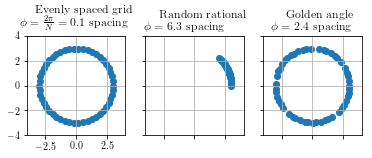

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

no_of_points=50
radius=3
phi1= 2*np.pi/no_of_points 
phi2= 6+np.round(rand.random()*10)/10
phi3= np.pi*(3-np.sqrt(5))
theta1=[phi1*i for i in range(0,no_of_points)]
theta2=[phi2*i for i in range(0,no_of_points)]
theta3=[phi3*i for i in range(0,no_of_points)]

# For tex use in title
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# First subplot
plt.subplot(2,3,1)
plt.scatter(3*np.cos(theta1),3*np.sin(theta1))
plt.axis('equal')
plt.axis([-radius-1,radius+1,-radius-1,radius+1])
plt.grid()
plt.title(r"Evenly spaced grid\\"
          r"$\phi=\frac{2\pi}{N}=%1.1f$ spacing" % phi1)

# Second subplot
ax=plt.subplot(2,3,2)
plt.scatter(3*np.cos(theta2),3*np.sin(theta2))
plt.axis('equal')
plt.axis([-radius-1,radius+1,-radius-1,radius+1])
plt.title(r"Random rational\\"
          r"$\phi=%1.1f$ spacing" % phi2)
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_yticklabels(),visible=False)
plt.grid()

# Third subplot
ax=plt.subplot(2,3,3)
plt.scatter(3*np.cos(theta3),3*np.sin(theta3))
plt.axis('equal')
plt.axis([-radius-1,radius+1,-radius-1,radius+1])
plt.title(r"Golden angle\\"
          r"$\phi=%1.1f$ spacing" % phi3)
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_yticklabels(),visible=False)
plt.grid()

plt.show()

## 2-D disk

Next, we focus on sampling evenly spaced points from the disk of radius $r$. Formally, the points on the disk forms the following set:
\begin{align}
\mathcal{D}&=\{(x,y)\in \mathbb{R}^2: x^2+y^2\leq r^2\} \nonumber\\
           &=\{(\rho\cos\theta, \rho\sin\theta)\in \mathbb{R}^2: \rho\in[0,r],\ \theta\in[0,2\pi)\}.
\end{align}

We will be using the concept of spirals to achieve this. A 2-D spiral is characterized by $(\rho,\theta)$ where $$\rho=r\sqrt{\frac{j}{N}}\mbox{, }\theta=j\phi$$
where $\phi\approx\pi(3-\sqrt{5})$ (the golden angle) and $j\in[1,N]$.

### Why is $\rho$ selected in this particular manner?

Imagine a inner circle in the disk with radius $r_c$. Let us say our spiral has $1\leq N_c\leq N$ points within the spiral. We would like the following relation to hold true: $$\frac{N_c}{N}=\frac{\pi r_c^2}{\pi r^2},$$ that is the number of points within the inner circle is proportional to its area. Why? Because for a Monte-Carlo simulation of a uniform random variable, we get the same result.

Solving this relation results in $$r_c=r\sqrt{\frac{N_c}{N}}.$$

The first row of subplots are for spirals with $\rho=r\sqrt{\frac{j}{N}}$ and the second row of subplots are for spirals with $\rho={\frac{jr}{N}}$. Note that the second rows have denser sampling closer to the center since this is equivalent to the Monte-Carlo simulation of a density of the form $\frac{1}{r}$.

### Why is $\phi$ the golden angle?

Since we have sampled $\rho$ based on a grid from $0$ to $N$, we can not rely on a grid to obtain $\theta$ due to the correlation (see the leftmost subplots). So we will define $\theta=j\phi$, but how to pick $\phi$. At this point, I only have the intuition provided by [Spreading points on a disc and on a sphere](http://blog.marmakoide.org/?p=1). Golden angle seems to provide the best coverage --- see the rightmost subplot on the top row.

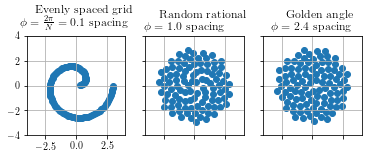

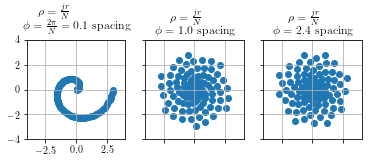

In [15]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt

no_of_points=100
radius_cir=3
radius_sample1=[radius_cir*np.sqrt(i/no_of_points) for i in range(1,no_of_points+1)]
radius_sample2=[radius_cir*i/no_of_points for i in range(1,no_of_points+1)]
phi1= 2*np.pi/no_of_points 
phi2= np.round(rand.random()*10)/10
phi3= np.pi*(3-np.sqrt(5))
theta1=[phi1*i for i in range(1,no_of_points+1)]
theta2=[phi2*i for i in range(1,no_of_points+1)]
theta3=[phi3*i for i in range(1,no_of_points+1)]

# For tex use in title
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# First subplot
plt.subplot(2,3,1)
plt.scatter(radius_sample1*np.cos(theta1),radius_sample1*np.sin(theta1))
plt.axis('equal')
plt.axis([-radius_cir-1,radius_cir+1,-radius_cir-1,radius_cir+1])
plt.grid()
plt.title(r"Evenly spaced grid\\"
          r"$\phi=\frac{2\pi}{N}=%1.1f$ spacing" % phi1)

# Second subplot
ax=plt.subplot(2,3,2)
plt.scatter(radius_sample1*np.cos(theta2),radius_sample1*np.sin(theta2))
plt.axis('equal')
plt.axis([-radius_cir-1,radius_cir+1,-radius_cir-1,radius_cir+1])
plt.title(r"Random rational\\"
          r"$\phi=%1.1f$ spacing" % phi2)
plt.grid()
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_yticklabels(),visible=False)

# Third subplot
ax=plt.subplot(2,3,3)
plt.scatter(radius_sample1*np.cos(theta3),radius_sample1*np.sin(theta3))
plt.axis('equal')
plt.axis([-radius_cir-1,radius_cir+1,-radius_cir-1,radius_cir+1])
plt.title(r"Golden angle\\"
          r"$\phi=%1.1f$ spacing" % phi3)
plt.grid()
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_yticklabels(),visible=False)

plt.figure()

# First subplot
plt.subplot(2,3,1)
plt.scatter(radius_sample2*np.cos(theta1),radius_sample2*np.sin(theta1))
plt.axis('equal')
plt.axis([-radius_cir-1,radius_cir+1,-radius_cir-1,radius_cir+1])
plt.grid()
plt.title(r"$\rho=\frac{jr}{N}$\\"
          r"$\phi=\frac{2\pi}{N}=%1.1f$ spacing" % phi1)

# Second subplot
ax=plt.subplot(2,3,2)
plt.scatter(radius_sample2*np.cos(theta2),radius_sample2*np.sin(theta2))
plt.axis('equal')
plt.axis([-radius_cir-1,radius_cir+1,-radius_cir-1,radius_cir+1])
plt.title(r"$\rho=\frac{jr}{N}$\\"
          r"$\phi=%1.1f$ spacing" % phi2)
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_yticklabels(),visible=False)
plt.grid()

# Third subplot
ax=plt.subplot(2,3,3)
plt.scatter(radius_sample2*np.cos(theta3),radius_sample2*np.sin(theta3))
plt.axis('equal')
plt.axis([-radius_cir-1,radius_cir+1,-radius_cir-1,radius_cir+1])
plt.title(r"$\rho=\frac{jr}{N}$\\"
          r"$\phi=%1.1f$ spacing" % phi3)
plt.setp(ax.get_xticklabels(),visible=False)
plt.setp(ax.get_yticklabels(),visible=False)
plt.grid()

plt.show()

## 3-D sphere surface

Next, we focus on sampling evenly spaced points on the surface of a 3-D sphere of radius $r$. Formally, the points on the 3-D sphere surface forms the following set:
\begin{align}
\mathcal{S}^2&=\{(x,y,z) \in \mathbb{R}^3: x^2+y^2+z^2=r^2\}\\
             &=\{(\rho\cos\theta,\rho\cos\theta,z) \in \mathbb{R}^3: \rho=\sqrt{r^2-z^2},\ \theta\in[0,2\pi)\}.
\end{align}
The idea would be to sample points on the 2-D disk and then set $z=\pm\sqrt{r^2-\rho^2}$. Note that another intuitive idea of a) sampling $z\in[-r,r]$, b) define $\rho=\sqrt{r^2-z^2}$ at every point, and c) sample $\theta$ from $[0,2\pi)$ will not work again because of the correlation between $z$ and $\theta$ (the cause of obtaining a spiral).

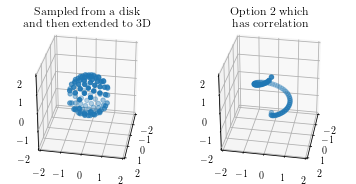

In [14]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

no_of_points=50
radius=1


# Idea 1
phi1= np.pi*(3-np.sqrt(5))
theta1=[phi1*i for i in range(0,no_of_points)]
rho_sample_1=[radius*np.sqrt(j/no_of_points) for j in range(0,no_of_points)];
points_1_x=[rho_value*np.cos(theta_value) for theta_value,rho_value in zip(theta1,rho_sample_1)]
points_1_y=[rho_value*np.sin(theta_value) for theta_value,rho_value in zip(theta1,rho_sample_1)]
points_1_x.extend(points_1_x)
points_1_y.extend(points_1_y)
points_1_z=[np.sqrt(radius**2-rho**2) for rho in rho_sample_1]
points_1_z.extend([-z_val for z_val in points_1_z])

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.set_aspect('equal')
ax.scatter(points_1_x,points_1_y,points_1_z,'m')           # Note that it is ax.scatter and not plt.scatter
plt.title("Sampled from a disk\nand then extended to 3D")
ax.set_xlim(-radius-1, radius+1)
ax.set_ylim(-radius-1, radius+1)
ax.set_zlim(-radius-1, radius+1)

ax.view_init(30,10)
# Idea 2
z_sample_2=np.linspace(-radius,radius,no_of_points)
phi2= 2*np.pi/no_of_points 
theta2=[phi2*i for i in range(0,no_of_points)]
rho_sample_2=[np.sqrt(radius**2 - zval**2) for zval in z_sample_2];
points_2_x=[rho_value*np.cos(theta_value) for theta_value,rho_value in zip(theta2,rho_sample_2)]
points_2_y=[rho_value*np.sin(theta_value) for theta_value,rho_value in zip(theta2,rho_sample_2)]
points_2_z=z_sample_2

ax = fig.add_subplot(122, projection='3d')
ax.set_aspect('equal')
ax.scatter(points_2_x,points_2_y,points_2_z)
plt.title("Option 2 which\nhas correlation")
ax.set_xlim(-radius-1, radius+1)
ax.set_ylim(-radius-1, radius+1)
ax.set_zlim(-radius-1, radius+1)
ax.view_init(30,10)
plt.show()

## 3-D sphere

Next we create a grid on the 3-D sphere. Carrying on from the above discussion, we will sample $z\in[-r,r]$, set $\rho=\sqrt{r^2-z^2}$, and sample $\theta$.  

Test